In [1]:
import matplotlib.pyplot as plt
import numpy as np

from H2.utils import cargar

# Graficar $\mathrm{H}_2^+$

El presente cuaderno de Jupyter contiene las funciones necesarias para graficar la energía de la molécula de hidrógeno ionizada para una combinación linean de orbitales atómicos (LCAO, por sus siglas en inglés) y la solución exacta.

## LCAO

Código para la energía a partir de la aproximación de combinación lineal de orbitales atómicos.

In [2]:
def S(r: float) -> float:
    """ Integral de traslape molécula de hidrógeno ionizada
        
    r : distancia interatómica
    """
    return np.exp(-r) * ((1/3) * np.square(r) + r + 1)

def J(r: float) -> float:
    """ Integral Coulombiana molécula de hidrógeno ionizada
        
    r : distancia interatómica
    """
    return np.exp(-2*r) * (1 + 1/r) - (1/r)

def K(r: float) -> float:
    """ Integral de intercambio molécula de hidrógeno ionizada
        
    r : distancia interatómica
    """
    return -np.exp(-r) * (1+r)

In [3]:
def HAA(r: float) -> float:
    return -1/2 + 1/r + J(r)

def HAB(r: float) -> float:
    return (1/r - 1/2)*S(r) + K(r)

In [4]:
def E(r: np.ndarray, signo: int) -> float:
    """ Energía molécula de hidrógeno ionizada

    Parámetros
        r : distancia interatómica
        signo : (1,-1) es el caso (ligante, antiligante)
    """
    return (HAA(r) + signo*HAB(r)) / (1 + signo*S(r))

## Solución exacta

Los valores de la energía (en Rydbergs) para diferentes distancias interatómicas (en radios de Bohr) para la solución exacta de la función $1\mathrm{s} \, \sigma_g$ serán extraídos de Bates et. al [1]. Dichos valores se encuentran en `data/H2+.csv` del presente trabajo.

In [5]:
xBates, yBates = cargar('H2+', usecols=(0,4))
yBates = yBates/2 # conversión de Rydbergs a Hartrees
yBates = -yBates # la energía original

In [6]:
xBurrau = np.array([1.0,   1.3,    1.6,  1.8,    2.0,   2.2,   2.4,  2.95])
yBurrau = np.array([0.896, 1.110, 1.186, 1.198, 1.204, 1.200, 1.192, 1.158])

yBurrau = -yBurrau/2

## Graficar

In [7]:
linewidth, fontsize, labelsize, alpha = 5, 22, 18, 0.4
name = 'H2+'
guardar_img = True

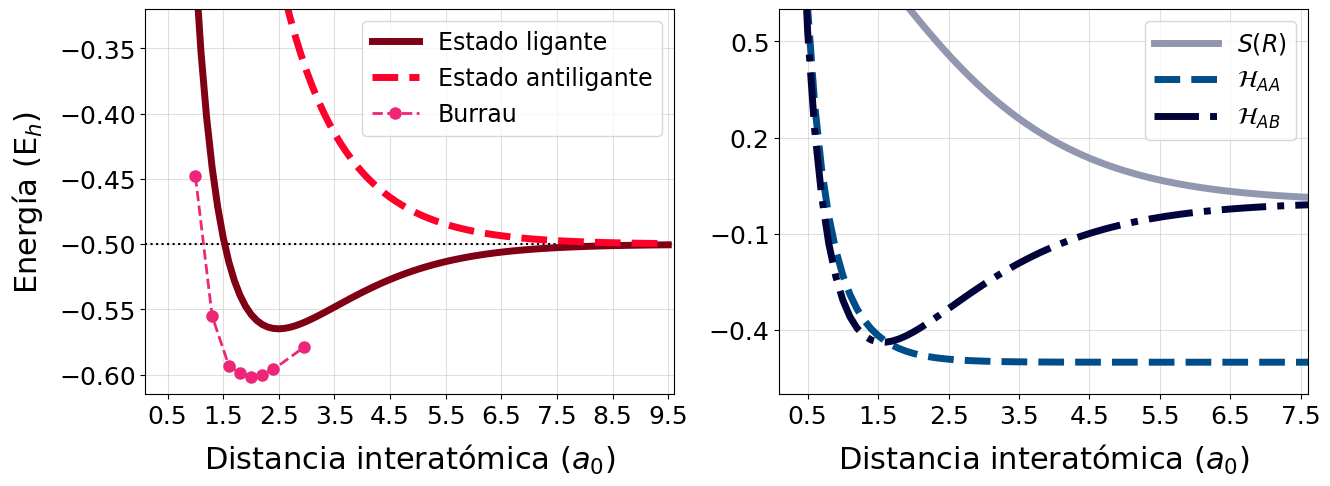

In [8]:
# Grafica de energía
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
###################
### Gráfica derecha
###################
r1min, r1max = 0.5, 9.6
r1 = np.arange(r1min, r1max, 0.1)
# plots
axs[0].axhline(y = -0.5, color='black', linestyle='dotted')
axs[0].plot(r1, E(r1,1), label='Estado ligante', color='#800016', linestyle='-', linewidth=linewidth)
axs[0].plot(r1, E(r1,-1), label='Estado antiligante', color='#ff002b', linestyle='--', linewidth=linewidth)
axs[0].plot(xBurrau, yBurrau, label='Burrau', color='#ee2677', linestyle='--', linewidth=2, marker='o', markersize=8)
# x config
axs[0].set_xticks(np.arange(0.5, 9.6, 1))
axs[0].set_xlim(0.1, 9.6)
axs[0].set_xlabel('Distancia interatómica ($a_0$)', fontsize=fontsize, labelpad=10)
# y config
axs[0].set_yticks(np.arange(-0.75, 0.7, 0.05))
axs[0].set_ylim(-0.615, -0.32)
axs[0].set_ylabel('Energía (E$_h$)', fontsize=fontsize, labelpad=10)
# plot config
axs[0].tick_params(axis='both', which='major', labelsize=labelsize)
axs[0].legend(fontsize=17, loc='upper right')
#####################
### Gráfica izquierda
#####################
r2 = np.arange(0.1, 8.6, 0.1)
# plots
axs[1].plot(r2, S(r2), label=r'$S(R)$', linewidth=linewidth, color='#9197ae', linestyle='-')
axs[1].plot(r2, HAA(r2), label=r'$\mathcal{H}_{AA}$', linewidth=linewidth, color='#004e89', linestyle='--')
axs[1].plot(r2, HAB(r2), label=r'$\mathcal{H}_{AB}$', linewidth=linewidth, color='#00043a', linestyle='-.')
# x config
r2min, r2max = 0.5, 7.6
axs[1].set_xticks(np.arange(r2min, r2max, 1))
axs[1].set_xlim(left=r2min-0.4, right=r2max)
axs[1].set_xlabel('Distancia interatómica ($a_0$)', fontsize=fontsize, labelpad=10)
# y config
axs[1].set_yticks(np.arange(-1, 1, 0.3))
axs[1].set_ylim(-0.6, 0.6)
# plot config
axs[1].tick_params(axis='both', which='major', labelsize=labelsize)
axs[1].legend(fontsize=17, loc='upper right', handlelength=2.7)
###################
### Config. gnral.
###################
fig.subplots_adjust(wspace=0.2)
for ax in axs:
    ax.grid(alpha=alpha)

if guardar_img is True:
    plt.savefig(f"imgs/{name}.svg", format="svg", bbox_inches='tight')
    
plt.show()